In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_curve,auc

In [143]:
# Gantilah ID file dengan ID dari Google Drive URL
file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'

# Buat URL unduhan langsung
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [145]:
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


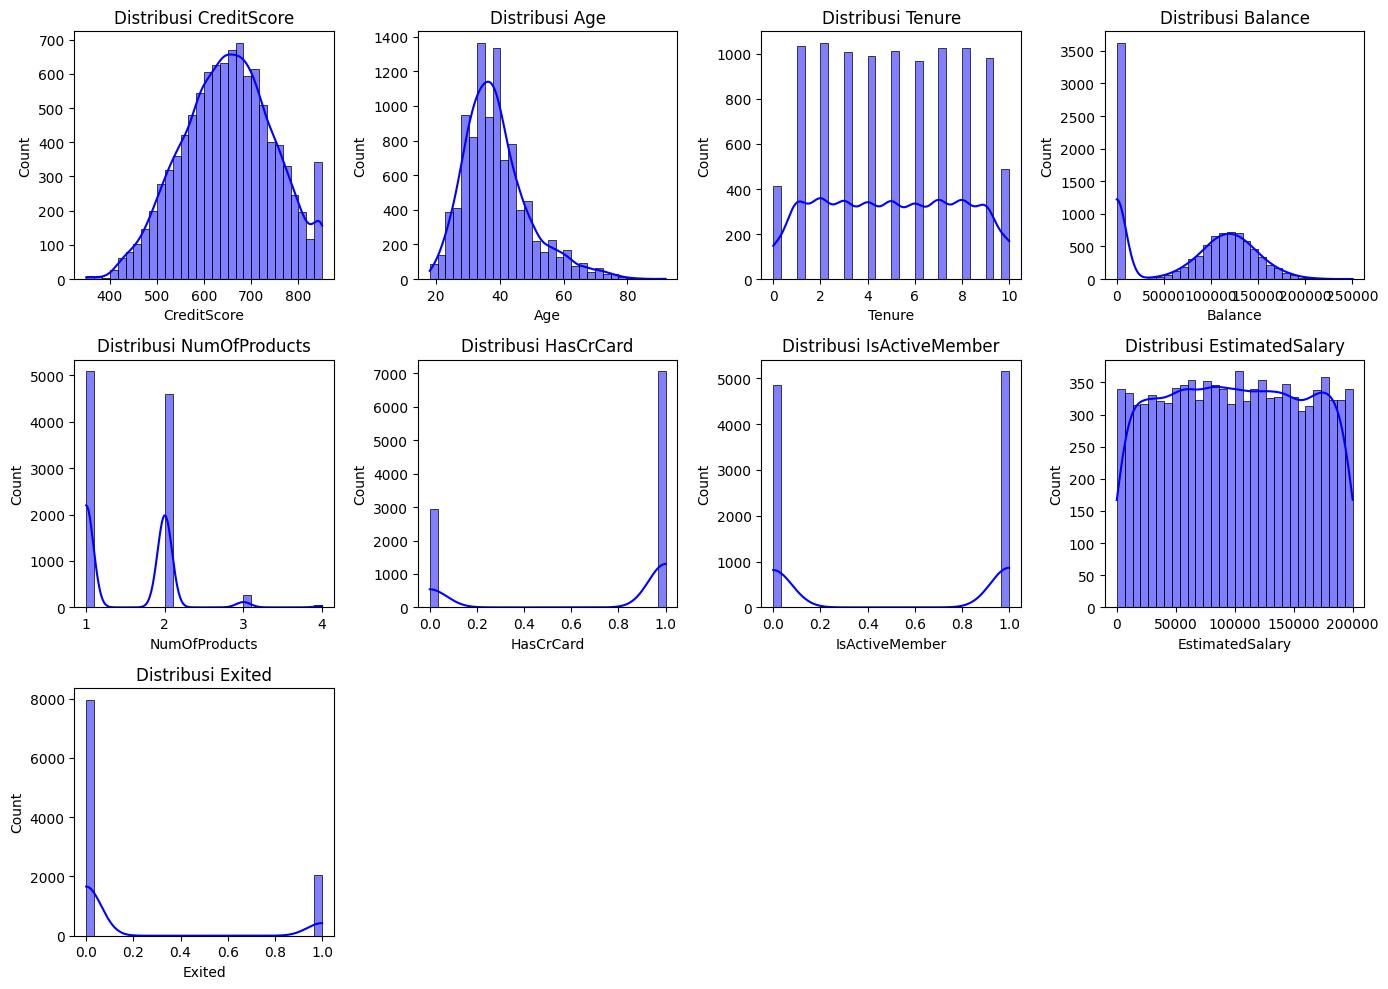

In [146]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

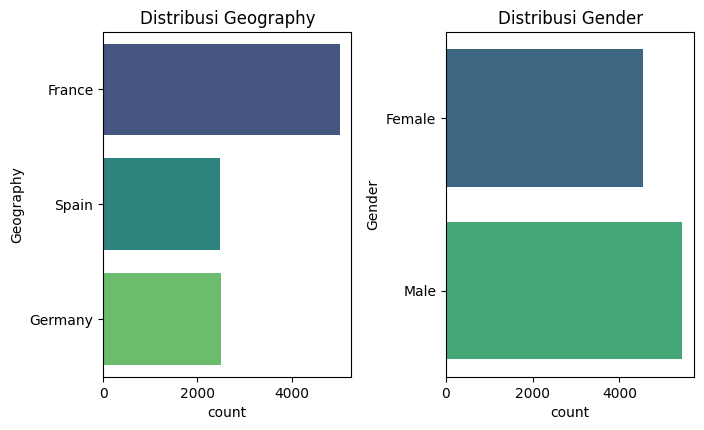

In [147]:
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column],hue=data[column] ,palette='viridis',legend=False)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

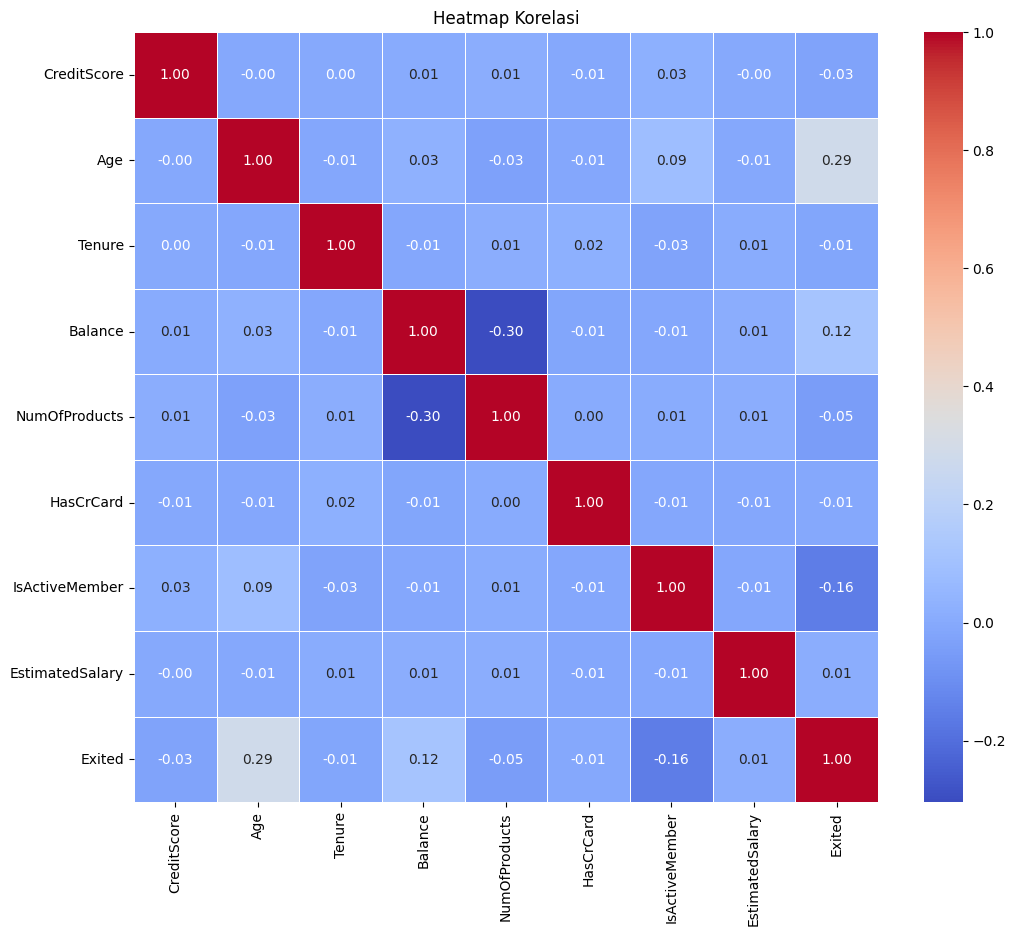

In [148]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

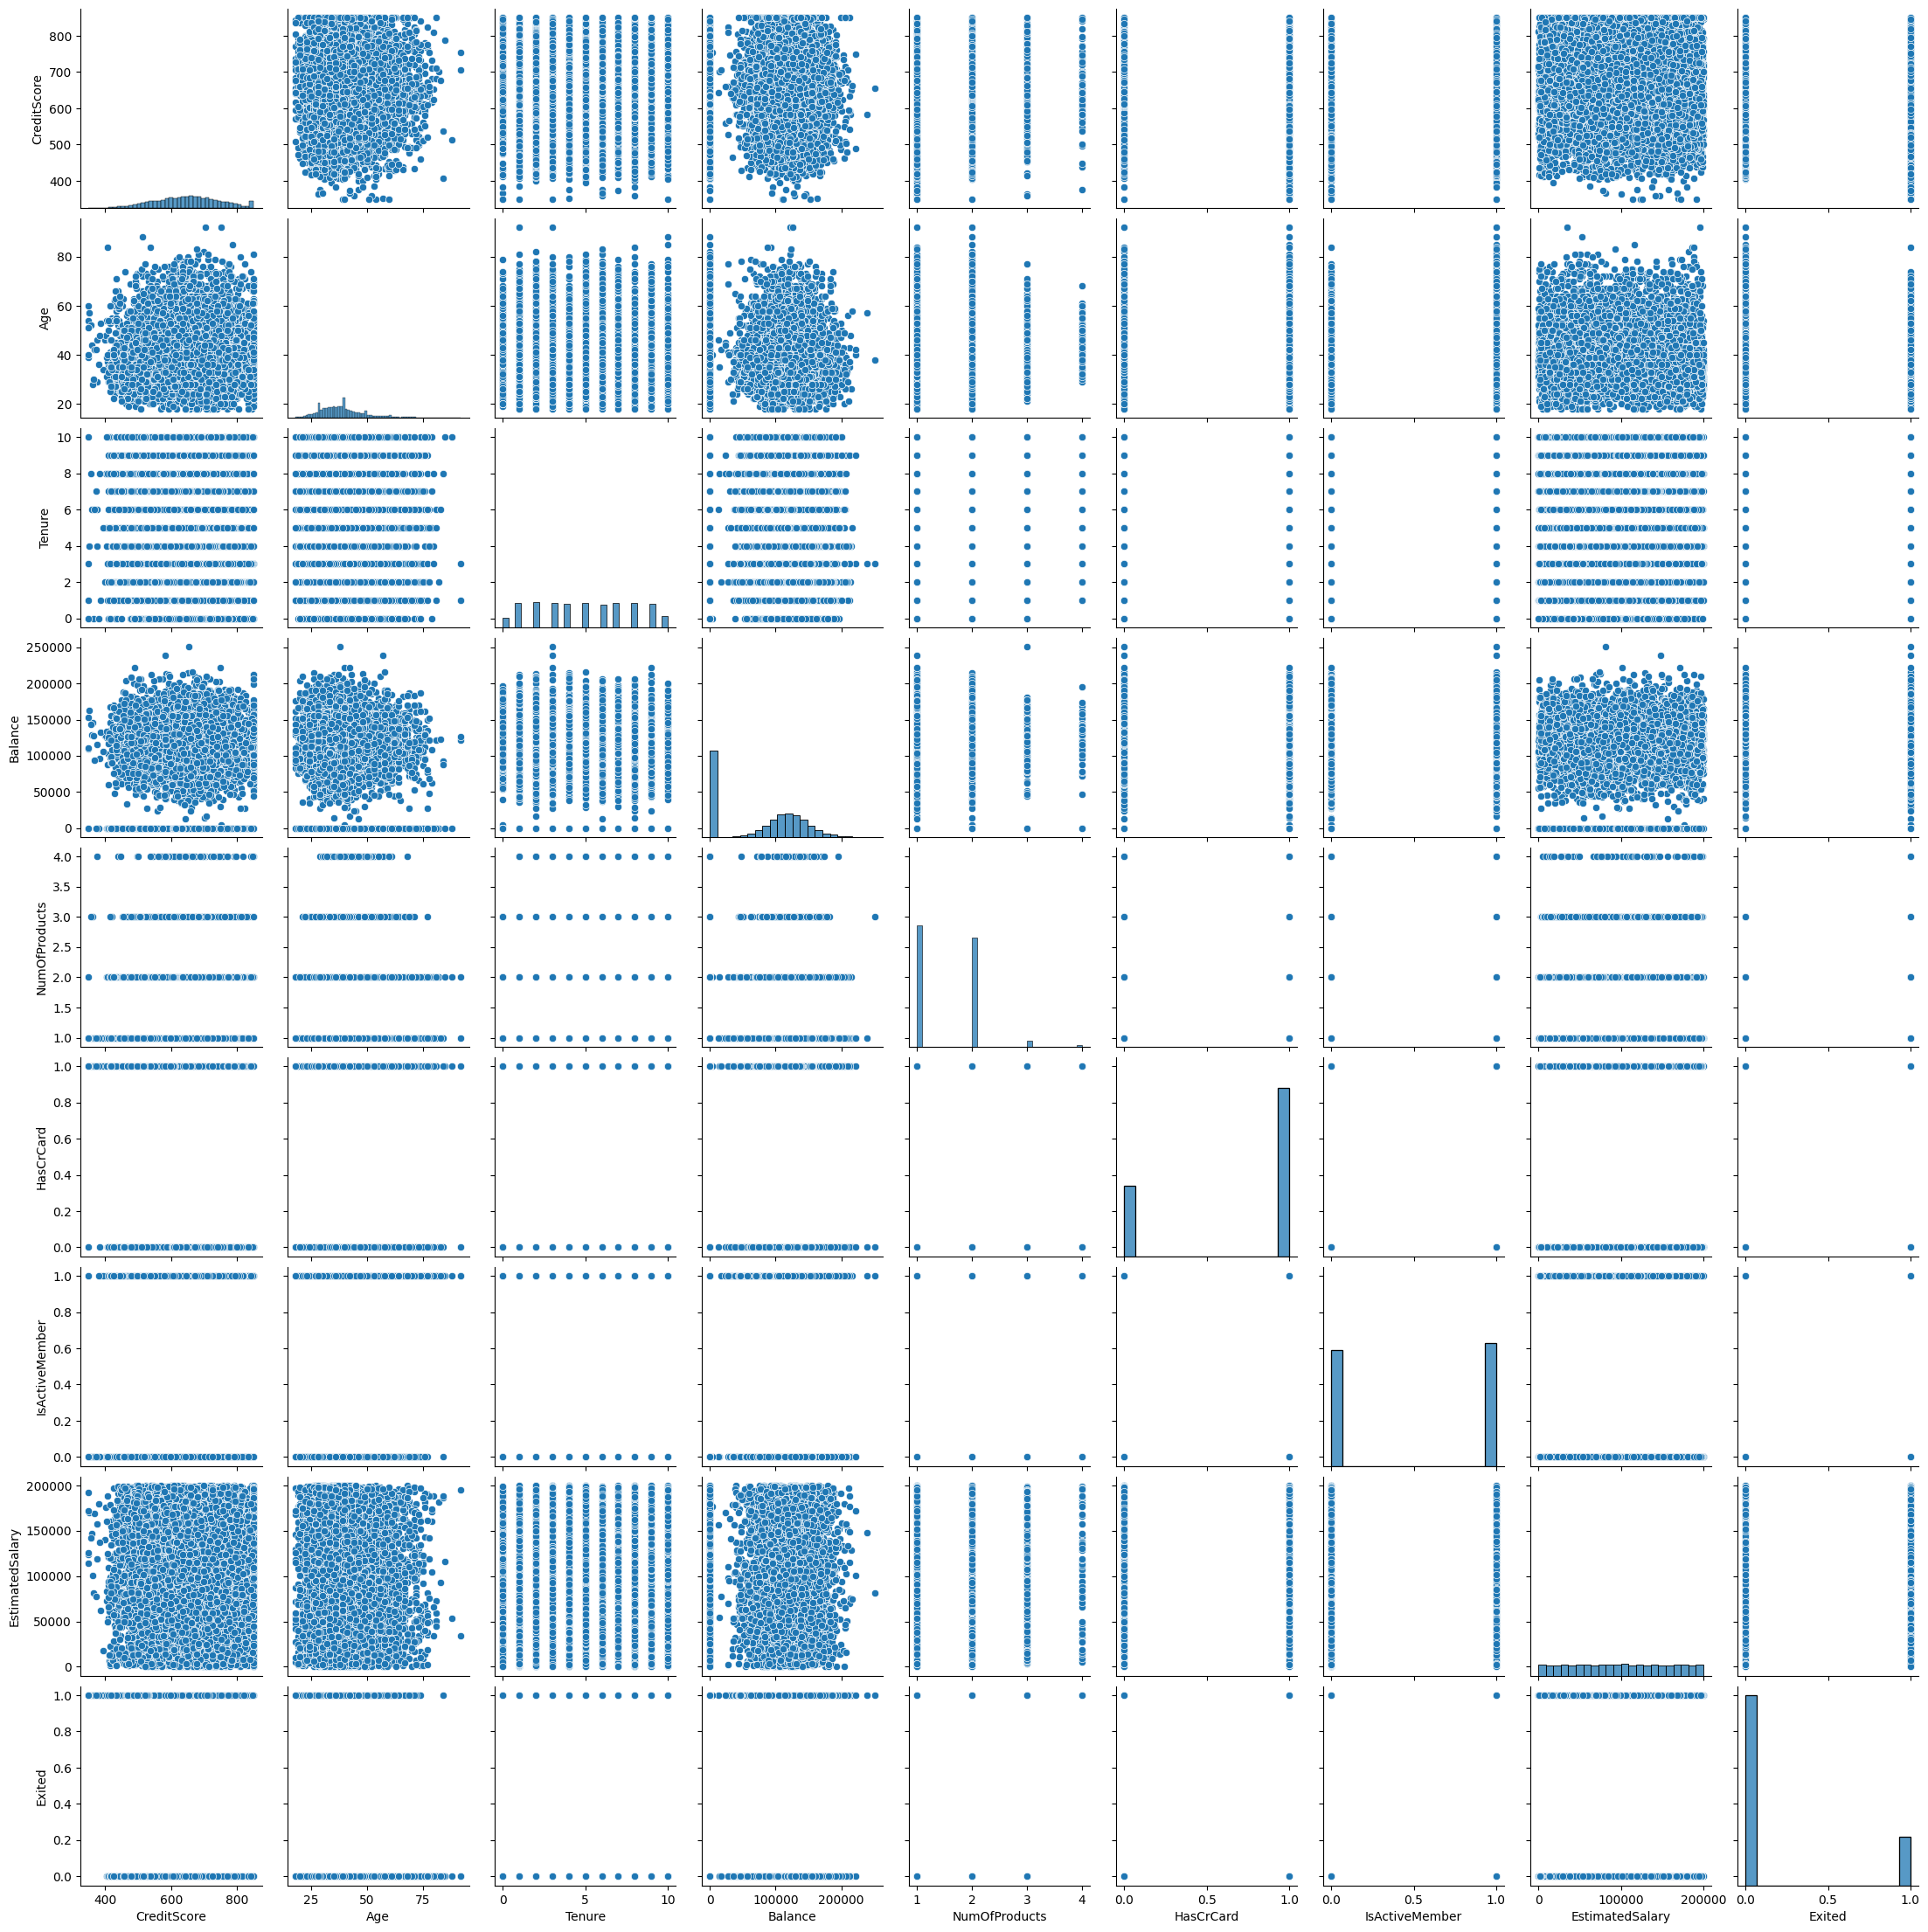

In [149]:
sns.pairplot(num_features)
plt.show()

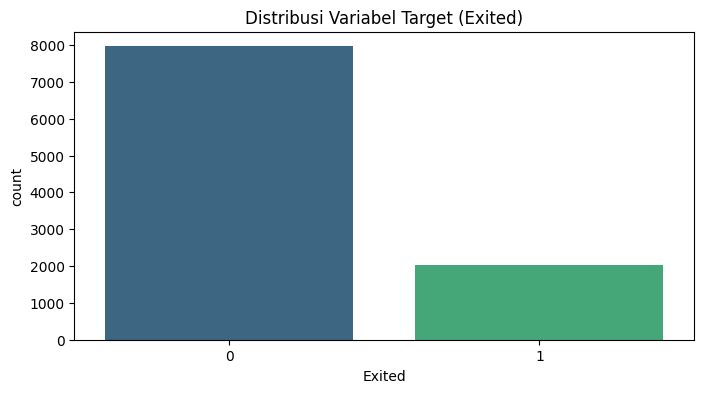

In [150]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited',hue='Exited', data=data, palette='viridis',legend=False)
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

In [151]:
label_encoder = LabelEncoder()

categorical_column =  ["Geography","Gender"]
for category in categorical_column:
    data[category] = label_encoder.fit_transform(data[category])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [152]:
scaler = MinMaxScaler()

numeric_column = data.select_dtypes(include=['int64','float64']).columns
data[numeric_column] = scaler.fit_transform(data[numeric_column])


x = data.drop(columns="Exited")
y = data["Exited"] # Dependent variable

x_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

print(f"Training set shape: X_train={x_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: x_test={x_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 10), y_train=(8000,)
Test set shape: X_test=(2000, 10), y_test=(2000,)


In [160]:
start = datetime.datetime.now()
nb = GaussianNB().fit(x_train,y_train)
knn = KNeighborsClassifier().fit(x_train,y_train)
dt = DecisionTreeClassifier().fit(x_train,y_train)
rf = RandomForestClassifier().fit(x_train,y_train)
svm = SVC().fit(x_train,y_train)


print('Elapsed time: ', str(datetime.datetime.now() - start))


Elapsed time:  0:00:01.947320


Text(0.5, -0.4, 'F1 Score: 0.35')

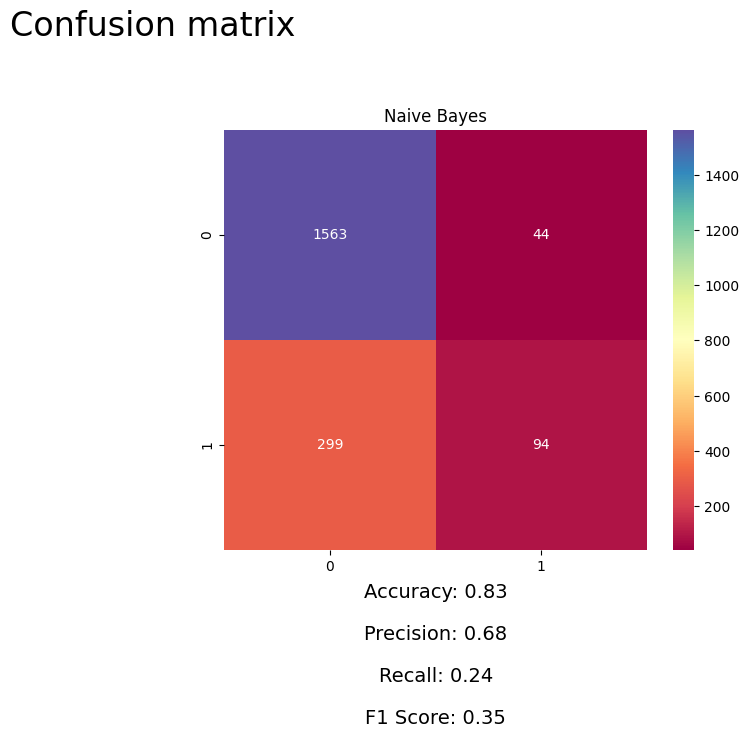

In [159]:
def evaluate_model(model,x_test,y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    acc_score = accuracy_score(y_test,y_pred)
    prec_score = precision_score(y_test,y_pred)
    rec_score = recall_score(y_test,y_pred)
    fone_score = f1_score(y_test,y_pred)

    return cm,acc_score,prec_score,rec_score,fone_score

cm_res,acc_score,prec_score,rec_score,fone_score = evaluate_model(model=nb,x_test=x_test,y_test=y_test)
plt.figure(figsize=(15,12))
plt.suptitle("Confusion matrix",fontsize=24)

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(cm_res,annot=True,fmt=".0f",cmap="Spectral")
plt.text(0.5, -0.1, f"Accuracy: {acc_score:.2f}",
         ha='center', va='center', fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, -0.2, f"Precision: {prec_score:.2f}",
         ha='center', va='center', fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, -0.3, f"Recall: {rec_score:.2f}",
         ha='center', va='center', fontsize=14, transform=plt.gca().transAxes)
plt.text(0.5, -0.4, f"F1 Score: {fone_score:.2f}",
         ha='center', va='center', fontsize=14, transform=plt.gca().transAxes)


In [167]:
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, x_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, x_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, x_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, x_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, x_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    cm_res,acc_score,prec_score,rec_score,fone_score = metrics
    rows.append({
        'Model': model_name,
        'Accuracy': acc_score,
        'Precision': prec_score,
        'Recall': rec_score,
        'F1-Score': fone_score
    })


# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)    0.8240   0.595349  0.325700  0.421053
1            Decision Tree (DT)    0.7800   0.447427  0.508906  0.476190
2            Random Forest (RF)    0.8690   0.771784  0.473282  0.586751
3  Support Vector Machine (SVM)    0.8530   0.827815  0.318066  0.459559
4              Naive Bayes (NB)    0.8285   0.681159  0.239186  0.354049


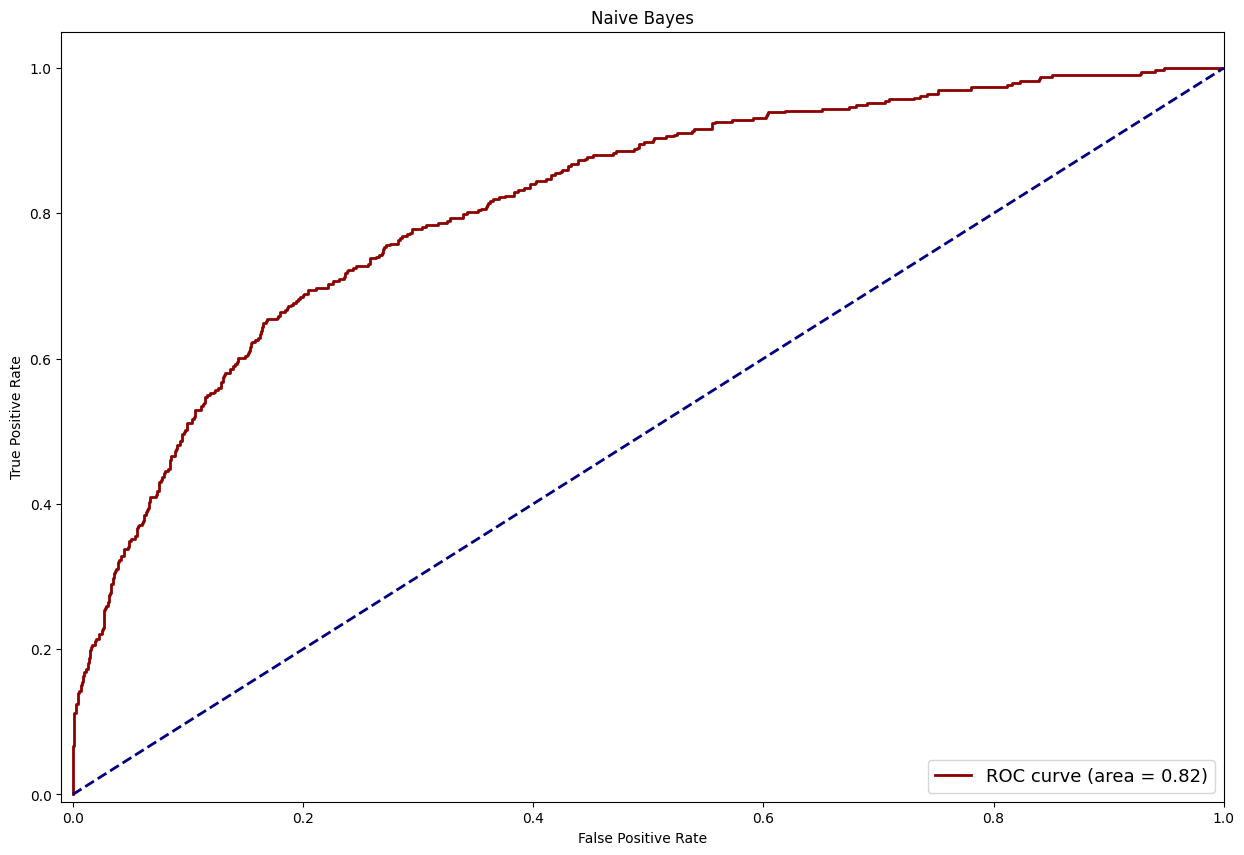

In [156]:
pred_nb = nb.predict_proba(
    x_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

f, axes = plt.subplots(figsize=(15,10))
axes.plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes.set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes.set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes.legend(loc='lower right', fontsize=13)
